# Example: Using `IntelELM` for Recognizing Hand-written Digits

In [ ]:
!python -m pip install intelelm==1.0.3

  Obtaining dependency information for intelelm==1.0.3 from https://files.pythonhosted.org/packages/a5/a5/8e9f6e5158e5d1195d631221eca22a4a15d28d4d500227b0275e7cada908/intelelm-1.0.3-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 10.9 MB/s eta 0:00:0000:0100:01


In [1]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from intelelm import ElmClassifier, MhaElmClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline

## Loading Digits Dataset

In [2]:
digits = datasets.load_digits()

## Dataset: Train/Test Split & Preprocessing

In [3]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False, random_state=1)

In [5]:
# Remember to scale features before model fitting. For this example, we use MinMaxScaler.
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train)
X_train_scaled = min_max_scaler.transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

In [6]:
# Using label encoding for classification
label_encoder = LabelEncoder()
label_encoder.fit(digits.target)

y_train_le = label_encoder.transform(y_train)
y_test_le = label_encoder.transform(y_test)

## Classification with Standard ELM Model

* Train an `ElmClassifier`

In [7]:
elm_clf = ElmClassifier(hidden_size=100, act_name="relu")
elm_clf.fit(X_train_scaled, y_train_le)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ElmClassifier(act_name='relu', hidden_size=100)

In [8]:
elm_predicted = elm_clf.predict(X_test_scaled)

* Report classification results

In [9]:
print(metrics.classification_report(y_test_le, elm_predicted))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92        88
           1       0.91      0.86      0.88        91
           2       0.95      0.91      0.93        86
           3       0.89      0.82      0.86        91
           4       0.96      0.88      0.92        92
           5       0.85      0.91      0.88        91
           6       0.92      0.99      0.95        91
           7       0.93      0.92      0.93        89
           8       0.83      0.72      0.77        88
           9       0.74      0.82      0.77        92

    accuracy                           0.88       899
   macro avg       0.88      0.88      0.88       899
weighted avg       0.88      0.88      0.88       899



Confusion Matrix [ELM]:
[[87  0  0  0  0  0  1  0  0  0]
 [ 3 78  1  1  1  0  1  0  2  4]
 [ 3  3 78  2  0  0  0  0  0  0]
 [ 0  2  1 75  0  5  0  2  3  3]
 [ 1  0  0  0 81  0  0  2  3  5]
 [ 0  0  0  1  0 83  1  0  0  6]
 [ 0  0  1  0  0  0 90  0  0  0]
 [ 0  0  0  1  2  2  0 82  1  1]
 [ 0  3  1  2  0  6  4  1 63  8]
 [ 7  0  0  2  0  2  1  1  4 75]]


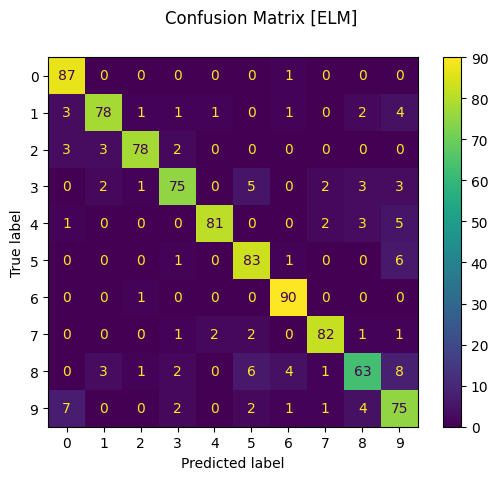

In [10]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test_le, elm_predicted)
disp.figure_.suptitle("Confusion Matrix [ELM]")
print(f"Confusion Matrix [ELM]:\n{disp.confusion_matrix}")

plt.show()

* A standard ElmClassifier with hidden size of 100 and relu activation function results in 88% accuracy.

## Classification with Metaheuristic-based ELM Model

* Train an `MhaElmClassifier`

In [11]:
opt_params = {
    "name": "GA",
    "epoch": 10,
    "pop_size": 30,
}

mha_elm_classifier = MhaElmClassifier(hidden_size=100, act_name="relu", obj_name="KLDL", optimizer="BaseGA", optimizer_paras=opt_params)

In [12]:
mha_elm_classifier.fit(X_train_scaled, y_train_le)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


MhaElmClassifier(act_name='relu', hidden_size=100, obj_name='KLDL',
                 optimizer=<mealpy.evolutionary_based.GA.BaseGA object at 0x7f90502d0ca0>,
                 optimizer_paras={'epoch': 10, 'name': 'GA', 'pop_size': 30})

In [13]:
mha_elm_predicted = mha_elm_classifier.predict(X_test_scaled)

* Report classification results

In [14]:
print(metrics.classification_report(y_test_le, mha_elm_predicted))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        88
           1       0.87      0.91      0.89        91
           2       0.92      0.90      0.91        86
           3       0.84      0.84      0.84        91
           4       0.98      0.86      0.91        92
           5       0.90      0.87      0.88        91
           6       0.95      0.97      0.96        91
           7       0.93      0.90      0.91        89
           8       0.94      0.86      0.90        88
           9       0.76      0.88      0.81        92

    accuracy                           0.90       899
   macro avg       0.90      0.90      0.90       899
weighted avg       0.90      0.90      0.90       899



Confusion Matrix [MHA-ELM]:
[[87  0  0  0  0  0  1  0  0  0]
 [ 0 83  5  2  0  0  0  0  1  0]
 [ 5  0 77  4  0  0  0  0  0  0]
 [ 0  1  0 76  0  1  0  5  0  8]
 [ 1  1  0  1 79  0  1  0  2  7]
 [ 0  1  1  1  0 79  1  0  0  8]
 [ 0  1  0  0  1  0 88  0  0  1]
 [ 0  3  0  0  1  4  0 80  0  1]
 [ 0  5  1  1  0  2  1  1 76  1]
 [ 1  0  0  5  0  2  1  0  2 81]]


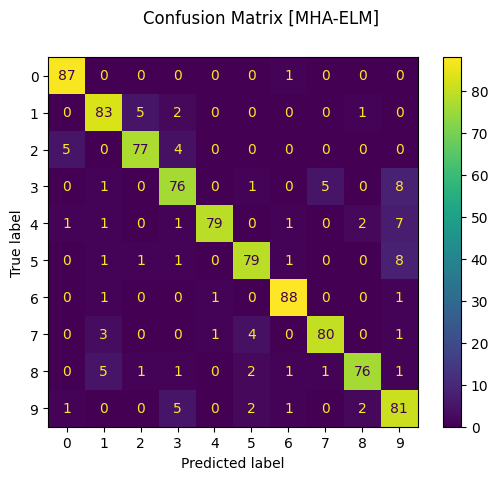

In [15]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test_le, mha_elm_predicted)
disp.figure_.suptitle("Confusion Matrix [MHA-ELM]")
print(f"Confusion Matrix [MHA-ELM]:\n{disp.confusion_matrix}")

plt.show()

* A Metaheuristic-based ElmClassifier with hidden size of 100 and relu activation function results in 93% accuracy. It is an improvement of 5%.